In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
import string
import spacy 
from wordcloud import WordCloud
%matplotlib inline

In [2]:
df=pd.read_csv("Elon_musk.csv",engine='python',encoding='ISO-8859-1')
df.drop(['Unnamed: 0'],inplace=True,axis=1)
df

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [3]:
"      ".strip()

''

### Text Preprocessing

In [4]:
df = [Text.strip() for Text in df.Text] 
df = [Text for Text in df if Text] 
df[0:5]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!']

In [5]:
tweets_text = ' '.join(df)
tweets_text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [6]:
no_punc_text = tweets_text.translate(str.maketrans('', '', string.punctuation))
no_punc_text

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewal

In [7]:
from nltk.tokenize import TweetTokenizer
tokens = TweetTokenizer(strip_handles=True)
tweet_tokens = tokens.tokenize(no_punc_text) 
print(tweet_tokens[0:50])  

['kunalb', '11', 'I', '\x92', 'm', 'an', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera', '27', 'Doge', 'is', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of']


In [8]:
len(tweet_tokens)

22604

In [9]:
import re
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox  Frodo was the underdoge\nAll thought he would fail\nHimself most of all  OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest  geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha  freewalletorg Any crypto wallet that won\x92t give you your private keys should

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in tweet_tokens if not word in my_stop_words]
print(no_stop_tokens[0:50])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Priyanka\AppData\Roaming\nltk_data...


['kunalb', '11', 'I', '\x92', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera', '27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco', '9WFKMYu2oj', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'httpstcozGxJFDzzrM', 'OwenSparks', 'flcnhvy', 'anonyx', '10']


[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Priyanka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:50])

['kunalb', '11', 'i', '\x92', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera', '27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'httpstco', '9wfkmyu2oj', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrm', 'owensparks', 'flcnhvy', 'anonyx', '10']


In [13]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:50])

['kunalb', '11', 'i', '\x92', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera', '27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'httpstco', '9wfkmyu2oj', 'frodo', 'underdog', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrm', 'owenspark', 'flcnhvi', 'anonyx', '10']


In [14]:
! python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2022-08-25 19:04:54.674675: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-08-25 19:04:54.674838: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [15]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [16]:
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:50])

kunalb 11 I  alien IDAACarmack Ray tracing Cyberpunk HDR nextlevel Have tried joerogan Spotify Great interview gtera 27 Doge underestimated teslacn Congratulations Tesla China amazing execution last year Now next even Happy New Year Ox httpstco 9WFKMYu2oj Frodo underdoge All thought would fail Himself httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx 10


In [17]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:50])

['kunalb', '11', 'I', '\x92', 'alien', 'IDAACarmack', 'Ray', 'trace', 'Cyberpunk', 'HDR', 'nextlevel', 'have', 'try', 'joerogan', 'spotify', 'great', 'interview', 'gtera', '27', 'Doge', 'underestimate', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco', '9WFKMYu2oj', 'Frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'Himself', 'httpstcozgxjfdzzrm', 'OwenSparks', 'flcnhvy', 'anonyx', '10']


In [18]:
final_tweets=' '.join(lemmas)
final_tweets

'kunalb 11 I \x92 alien IDAACarmack Ray trace Cyberpunk HDR nextlevel have try joerogan spotify great interview gtera 27 Doge underestimate teslacn Congratulations Tesla China amazing execution last year now next even Happy New Year Ox httpstco 9WFKMYu2oj Frodo underdoge all thought would fail Himself httpstcozgxjfdzzrm OwenSparks flcnhvy anonyx 10 Haha thank flcnhvy anonyx 10 Indeed Tweets definitely represent realworld time allocation the entertaining outcome likely GiveDirectly just send just agree Clubhouse kanyew httpstco 3rWE9uHSTS geoffkeighley UnrealEngine it \x92 get real Bought Dogecoin lil x toddler hodler JoshManMode he definitely issue sentencing seem bit high freewalletorg thank fix freewalletorg please unlock account AstroJordy U0001F923U0001F923 this true power haha httpstcoFc 9uhqsd7o freewalletorg any crypto wallet \x92 give private key avoid cost freewalletorg your app suck RT SpaceX NASA select Falcon Heavy launch first two element lunar gateway together one mission

# Feature Extraction

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)
print(vectorizer.vocabulary_)

{'kunalb': 3111, '11': 77, 'alien': 807, 'idaacarmack': 2850, 'ray': 4029, 'trace': 4900, 'cyberpunk': 1540, 'hdr': 2254, 'nextlevel': 3562, 'have': 2248, 'try': 4935, 'joerogan': 3031, 'spotify': 4519, 'great': 2187, 'interview': 2960, 'gtera': 2206, '27': 197, 'doge': 1693, 'underestimate': 5068, 'teslacn': 4745, 'congratulations': 1435, 'tesla': 4739, 'china': 1318, 'amazing': 833, 'execution': 1904, 'last': 3131, 'year': 5341, 'now': 3602, 'next': 3561, 'even': 1876, 'happy': 2235, 'new': 3558, 'ox': 3721, 'httpstco': 2342, '9wfkmyu2oj': 691, 'frodo': 2074, 'underdoge': 5067, 'all': 810, 'thought': 4825, 'would': 5317, 'fail': 1940, 'himself': 2300, 'httpstcozgxjfdzzrm': 2809, 'owensparks': 3718, 'flcnhvy': 2016, 'anonyx': 862, '10': 69, 'haha': 2221, 'thank': 4783, 'indeed': 2900, 'tweets': 4957, 'definitely': 1595, 'represent': 4111, 'realworld': 4053, 'time': 4844, 'allocation': 812, 'the': 4791, 'entertaining': 1832, 'outcome': 3698, 'likely': 3193, 'givedirectly': 2159, 'just'

In [20]:
print(vectorizer.get_feature_names()[50:100])
print(X.toarray()[50:100])

['0rd', '0rg2qoaf', '0rm', '0rv0yq5q', '0s0ybscm0p', '0sjit', '0snf4ugyk', '0srlfg03fg', '0sz9cbzg', '0t2', '0thlr48n', '0v9gi47', '0vas3cck9p', '0vdefyc', '0wnuin', '0wwqstaxm', '0y5fkvqpk8', '0yo4jkbs2', '0yrjobe', '10', '100', '1000', '10000', '1028', '107', '10phoenix', '10x', '11', '112', '117', '11742', '11nikql', '11thhour', '12', '122', '12iq', '13', '13031925', '130pm', '13arm13arm', '13ericralph31', '14', '140pm', '147', '149watt', '14fozdo8', '14pksayi', '14yearold', '15', '150']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [21]:
print(X.toarray().shape)

(16905, 5374)


### CountVectorizer( Bigrams & Trigrams)

In [22]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(lemmas)

In [23]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['45', 'actually', 'ajtourville', 'also', 'amp', 'austinbarnard', 'big', 'car', 'cleantechnica', 'come', 'could', 'crew', 'day', 'dragon', 'earth', 'engine', 'ercxspace', 'erdayastronaut', 'evafoxu', 'even', 'exactly', 'falcon', 'felixschlang', 'first', 'flcnhvy', 'flight', 'get', 'go', 'good', 'great', 'haha', 'hard', 'high', 'httpstco', 'idaacarmack', 'it', 'kristennetten', 'land', 'launch', 'lexfridman', 'like', 'lot', 'make', 'marcushousegame', 'maybe', 'mission', 'model', 'much', 'nasa', 'nasaspaceflight', 'need', 'new', 'next', 'no', 'not', 'one', 'people', 'ppathole', 'pretty', 'probably', 'production', 'rationaletienne', 'right', 'rt', 'soon', 'space', 'spacestation', 'spacex', 'starship', 'still', 'sure', 'take', 'tesla', 'teslaownerssv', 'teslarati', 'tesmaniancom', 'test', 'that', 'the', 'thesheetztweetz', 'they', 'think', 'this', 'time', 'tobyliiiiiiiiii', 'true', 'u0001f923u0001f923', 'use', 'way', 'we', 'week', 'well', 'wholemarsblog', 'will', 'work', 'would', 'yeah', 'ye

## TFidf vectorizer

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(lemmas)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['10', '100', '11', '11742', '13', '13031925', '15', '20', '247', '28delayslater', '30', '305', '3d', '3owner', '45', '60', '74', '85', '8p', 'able', 'absolutely', 'access', 'accurate', 'actually', 'adamklotz', 'add', 'ago', 'agree', 'ai', 'air', 'ajtourville', 'all', 'almost', 'already', 'also', 'although', 'amazing', 'amp', 'and', 'another', 'appear', 'apply', 'appreciate', 'archillect', 'around', 'article', 'as', 'astrobehnken', 'astrodoug', 'astrojordy', 'astronaut', 'at', 'austinbarnard', 'autopilot', 'awesome', 'back', 'bad', 'bar', 'base', 'battery', 'bbcsciencenews', 'be', 'become', 'benmezrich', 'berlin', 'berniesanders', 'beta', 'big', 'bit', 'boca', 'bocachicagal', 'body', 'booster', 'boringcompany', 'build', 'but', 'call', 'camera', 'can', 'car', 'cargo', 'casparstanley', 'cbass', 'cell', 'change', 'cleantechnica', 'close', 'cold', 'come', 'company', 'complete', 'confirm', 'congratulations', 'control', 'cool', 'cost', 'could', 'course', 'crew', 'cyberpunkgame', 'day', 'defi

## Generate wordcloud

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off");

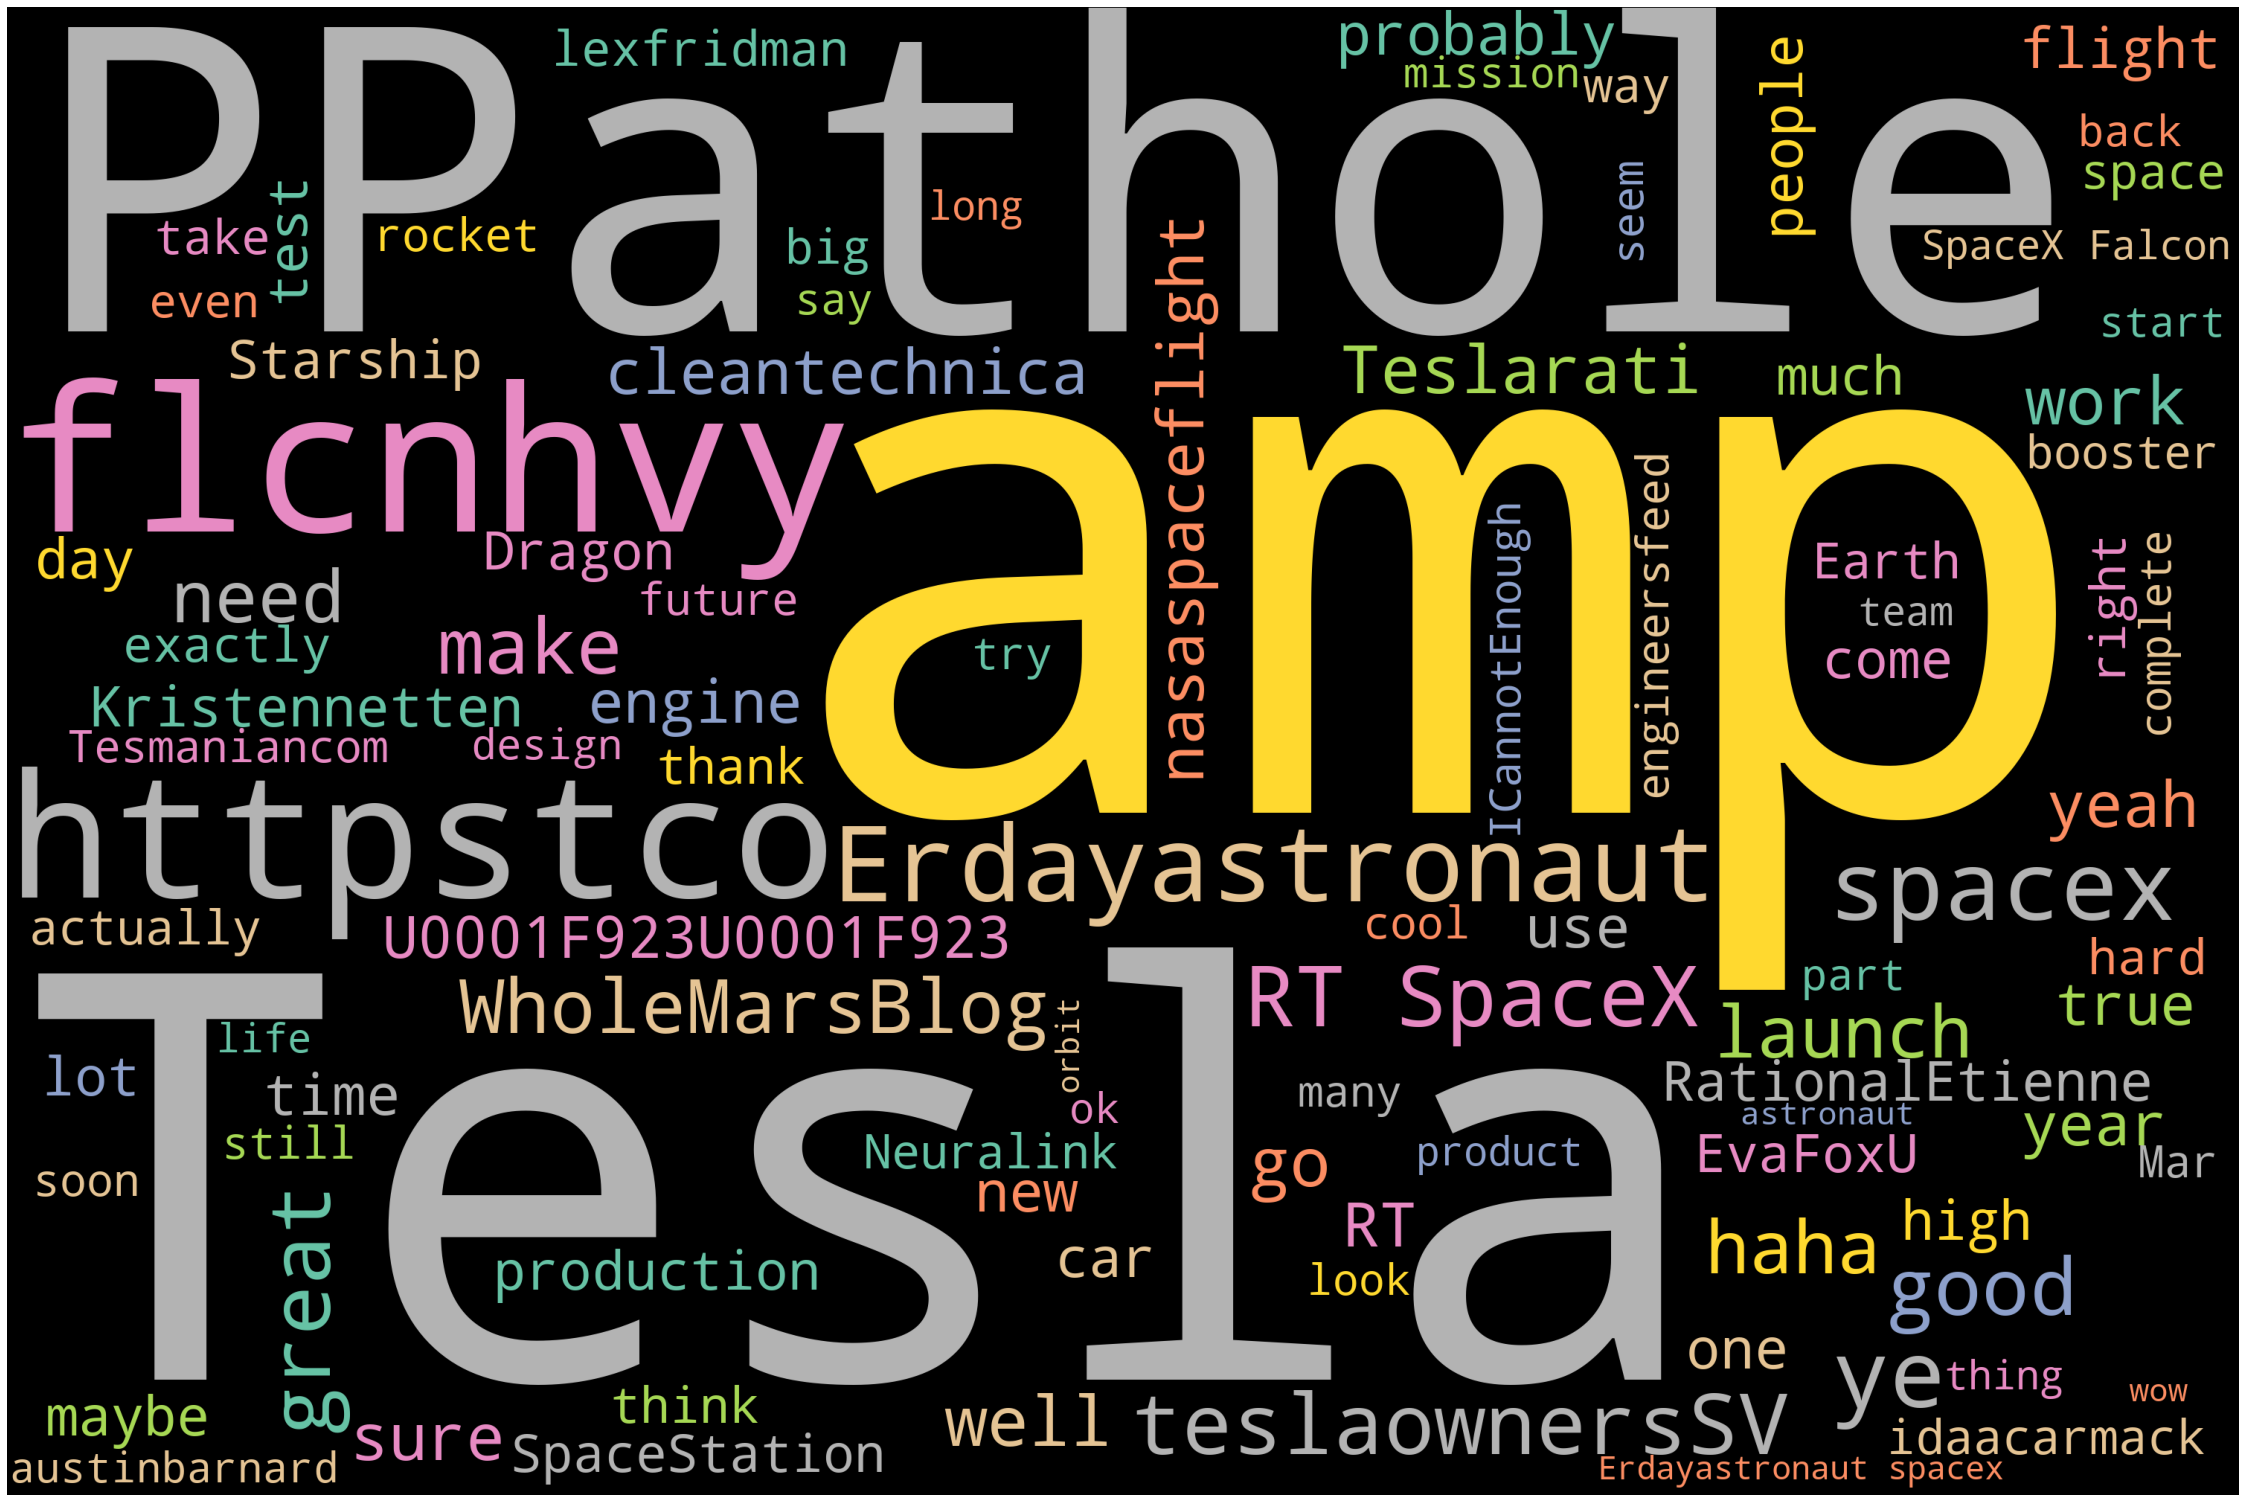

In [26]:
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(final_tweets)
plot_cloud(wordcloud)

### Named Entity Recognition

In [27]:
nlp = spacy.load("en_core_web_sm")
one_block = final_tweets
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [28]:
all_ents=[]
for word in doc_block.ents:
    
    all_ents.append(word.label_)
set(all_ents) 

{'CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART'}

In [29]:
doc_block = nlp(one_block)
for token in doc_block[:]:
    print(token,"==>", token.pos_)

kunalb ==> VERB
11 ==> NUM
I ==> PRON
 ==> PROPN
alien ==> PROPN
IDAACarmack ==> PROPN
Ray ==> PROPN
trace ==> VERB
Cyberpunk ==> PROPN
HDR ==> PROPN
nextlevel ==> NOUN
have ==> AUX
try ==> VERB
joerogan ==> PROPN
spotify ==> VERB
great ==> ADJ
interview ==> NOUN
gtera ==> NOUN
27 ==> NUM
Doge ==> PROPN
underestimate ==> ADJ
teslacn ==> NOUN
Congratulations ==> PROPN
Tesla ==> PROPN
China ==> PROPN
amazing ==> ADJ
execution ==> NOUN
last ==> ADJ
year ==> NOUN
now ==> ADV
next ==> ADV
even ==> ADV
Happy ==> PROPN
New ==> PROPN
Year ==> PROPN
Ox ==> PROPN
httpstco ==> NOUN
9WFKMYu2oj ==> VERB
Frodo ==> PROPN
underdoge ==> ADJ
all ==> DET
thought ==> NOUN
would ==> AUX
fail ==> VERB
Himself ==> PROPN
httpstcozgxjfdzzrm ==> ADJ
OwenSparks ==> PROPN
flcnhvy ==> NOUN
anonyx ==> NOUN
10 ==> NUM
Haha ==> PROPN
thank ==> VERB
flcnhvy ==> NOUN
anonyx ==> NOUN
10 ==> NUM
Indeed ==> PROPN
Tweets ==> PROPN
definitely ==> ADV
represent ==> VERB
realworld ==> PROPN
time ==> PROPN
allocation ==> NOUN

land ==> NOUN
I ==> PRON
become ==> VERB
meme ==> ADJ
Destroyer ==> PROPN
short ==> ADJ
commandercruz ==> NOUN
might ==> AUX
actually ==> ADV
happen ==> VERB
sandstorm ==> NOUN
masterpiece ==> NOUN
MadOverlord ==> PROPN
we ==> PRON
dumb ==> VERB
next ==> ADJ
time ==> NOUN
try ==> AUX
pull ==> VERB
method ==> NOUN
httpstcoJ ==> PROPN
1m7whlrdr ==> PROPN
Lowkey ==> PROPN
Loki ==> PROPN
no ==> DET
high ==> ADJ
low ==> ADJ
Doge ==> PROPN
no ==> DET
need ==> NOUN
gigachad ==> VERB
dogecoin ==> NOUN
people ==> NOUN
 ==> PROPN
crypto ==> PROPN
ur ==> PROPN
welcome ==> VERB
httpstcoe ==> PROPN
2kf57klxb ==> NUM
HuobiGlobal ==> PROPN
the ==> DET
entertaining ==> ADJ
outcome ==> NOUN
likely ==> ADJ
Doge ==> PROPN
httpstcovviUzWhodT ==> PROPN
Erdayastronaut ==> PROPN
High ==> PROPN
sea ==> NOUN
amp ==> NOUN
wind ==> NOUN
this ==> PRON
tough ==> ADJ
one ==> NUM
httpstcobeY ==> PROPN
7pefpcj ==> NUM
RT ==> PROPN
SpaceX ==> PROPN
Watch ==> PROPN
Falcon ==> PROPN
9 ==> NUM
launch ==> NOUN
60 ==> NUM

minor ==> ADJ
update ==> NOUN
httpstcoQmHipv ==> NUM
5zq ==> NOUN
nasaspaceflight ==> NOUN
Hopefully ==> ADV
early ==> ADV
next ==> ADJ
week ==> NOUN
RT ==> PROPN
SpaceX ==> PROPN
due ==> ADJ
unfavorable ==> ADJ
weather ==> NOUN
stand ==> NOUN
today ==> NOUN
launch ==> NOUN
team ==> NOUN
continue ==> VERB
countdown ==> VERB
T30 ==> PROPN
seco ==> PROPN
arstechnica ==> PROPN
SciGuySpace ==> PROPN
give ==> VERB
many ==> ADJ
company ==> NOUN
depend ==> VERB
mission ==> NOUN
get ==> VERB
even ==> ADV
scru ==> ADJ
httpstcogby ==> PROPN
9NACrSn ==> PROPN
launch ==> VERB
many ==> ADJ
small ==> ADJ
satellite ==> NOUN
wide ==> ADJ
range ==> NOUN
customer ==> NOUN
tomorrow ==> NOUN
Excited ==> PROPN
offer ==> VERB
lowcost ==> ADJ
access ==> NOUN
httpstcow ==> PROPN
66u5qduh9 ==> NUM
GerberKawasaki ==> PROPN
they ==> PRON
part ==> NOUN
solution ==> NOUN
require ==> VERB
lot ==> NOUN
fresh ==> ADJ
water ==> NOUN
amp ==> NOUN
land ==> NOUN
we ==> PRON
may ==> AUX
need ==> VERB
something ==> PRON
 

Erdayastronaut ==> PROPN
spacex ==> VERB
that ==> SCONJ
sean ==> NOUN
18743005 ==> NUM
Erdayastronaut ==> PROPN
spacex ==> VERB
Catapult ==> PROPN
high ==> ADJ
air ==> NOUN
amp ==> PROPN
land ==> NOUN
roof ==> NOUN
base ==> NOUN
jump ==> NOUN
parachute ==> ADJ
way ==> NOUN
travel ==> NOUN
Erdayastronaut ==> PROPN
spacex ==> VERB
that ==> PRON
 ==> PROPN
actually ==> ADV
restaurant ==> VERB
SpaceX ==> NOUN
build ==> VERB
futuristic ==> ADJ
bar ==> NOUN
top ==> NOUN
h ==> NOUN
httpstcoz ==> VERB
2umtgsaoi ==> NUM
techreview ==> NOUN
and ==> CCONJ
increase ==> VERB
fun ==> NOUN
Hopefully ==> PROPN
benmezrich ==> VERB
I ==> PRON
neither ==> CCONJ
tonychomrmagic ==> VERB
TeslaEnergy ==> PROPN
one ==> NUM
good ==> ADJ
Tesla ==> PROPN
Solar ==> PROPN
Roof ==> PROPN
installation ==> NOUN
91demigod ==> PUNCT
no ==> DET
maybe ==> ADV
one ==> NUM
day ==> NOUN
PPathole ==> PROPN
engineersfeed ==> VERB
yes ==> INTJ
would ==> AUX
well ==> ADV
way ==> ADV
a ==> DET
large ==> ADJ
solar ==> ADJ
field 

soon ==> ADV
OLHZN ==> PROPN
Minor ==> PROPN
TrevorMahlmann ==> PROPN
Yeah ==> PROPN
12 ==> NUM
story ==> NOUN
rocket ==> NOUN
turn ==> NOUN
engine ==> NOUN
amp ==> NOUN
control ==> NOUN
fall ==> PROPN
httpstcoHCRgyx ==> PROPN
42rn ==> NOUN
Erdayastronaut ==> PROPN
Yup ==> PROPN
 ==> PROPN
iron ==> NOUN
bug ==> NOUN
to ==> ADP
Tesla ==> PROPN
owner ==> NOUN
take ==> VERB
delivery ==> NOUN
final ==> ADJ
day ==> NOUN
year ==> NOUN
support ==> VERB
super ==> ADV
appreciate ==> VERB
deepmind ==> ADJ
nature ==> NOUN
Frictionless ==> PROPN
AI ==> PROPN
what ==> PRON
could ==> AUX
possibly ==> ADV
go ==> VERB
wrong ==> ADJ
heydave ==> VERB
7 ==> NUM
good ==> ADJ
idea ==> NOUN
wintonark ==> NOUN
during ==> ADP
darkest ==> ADJ
day ==> NOUN
Model ==> PROPN
3 ==> NUM
program ==> NOUN
I ==> PRON
reach ==> VERB
Tim ==> PROPN
Cook ==> PROPN
discuss ==> NOUN
possibility ==> NOUN
httpstcoopTz ==> PROPN
9urne0 ==> NUM
wintonark ==> ADJ
strange ==> ADJ
true ==> ADJ
Tesla ==> PROPN
already ==> ADV
use =

Life ==> PROPN
Universe ==> PROPN
Everything ==> PROPN
httpstco ==> NOUN
1zczinfc4u ==> NUM
Erdayastronaut ==> PROPN
yeah ==> INTJ
engine ==> NOUN
great ==> ADJ
Mars ==> PROPN
come ==> VERB
Fuel ==> PROPN
header ==> NOUN
tank ==> NOUN
pressure ==> NOUN
low ==> ADJ
landing ==> NOUN
burn ==> NOUN
cause ==> VERB
touchdown ==> NOUN
velocity ==> NOUN
high ==> ADJ
amp ==> NOUN
RUD ==> PROPN
get ==> VERB
httpstcowGJVdSahmF ==> PROPN
successful ==> ADJ
ascent ==> NOUN
switchover ==> PROPN
header ==> NOUN
tank ==> NOUN
amp ==> NOUN
precise ==> ADJ
flap ==> NOUN
control ==> NOUN
landing ==> NOUN
point ==> NOUN
httpstcoIIraiESg ==> PROPN
5 ==> NUM
M ==> PROPN
thebabylonbee ==> NOUN
u0001f920 ==> ADV
wonderofscience ==> ADV
Nearorbital ==> PROPN
space ==> NOUN
fast ==> ADJ
way ==> NOUN
travel ==> VERB
long ==> ADJ
distance ==> NOUN
Earth ==> NOUN
spacex ==> NOUN
SpaceStation ==> PROPN
it ==> PRON
 ==> PROPN
call ==> VERB
Space ==> PROPN
 ==> PROPN
Station ==> PROPN
 ==> PROPN
 ==> PROPN
actual

develop ==> VERB
amp ==> NOUN
continue ==> VERB
use ==> VERB
lidar ==> NOUN
Dragon ==> PROPN
dock ==> NOUN
httpstco ==> NOUN
3i0bwgjlqp ==> NUM
PhilippeCROIZON ==> PROPN
spacex ==> VERB
one ==> NUM
day ==> NOUN
fly ==> NOUN
starship ==> NOUN
PeterJBeck ==> NOUN
well ==> INTJ
do ==> VERB
hisdirtremove ==> NOUN
spacex ==> ADV
I ==> PRON
 ==> VERB
comment ==> NOUN
turbopump ==> NOUN
internal ==> ADJ
detail ==> NOUN
 ==> PROPN
roughly ==> ADV
ballpark ==> ADJ
wow ==> INTJ
roc ==> PROPN
httpstco ==> PROPN
0SRlFg03Fg ==> PROPN
tashaark ==> NOUN
to ==> AUX
clear ==> VERB
XPeng ==> PROPN
problem ==> NOUN
other ==> ADJ
company ==> NOUN
China ==> PROPN
do ==> AUX
IsaacLatterell ==> PROPN
tashaark ==> VERB
karpathy ==> PROPN
Andrej ==> PROPN
awesome ==> ADV
say ==> VERB
talented ==> ADJ
Autopilot ==> PROPN
httpstco ==> NOUN
64ocngk3ey ==> NUM
spacetouristuk ==> NOUN
tashaark ==> PROPN
yeah ==> INTJ
they ==> PRON
steal ==> VERB
Apple ==> PROPN
 ==> PROPN
code ==> NOUN
httpstcogy ==> NOUN
4dt7pq

question ==> NOUN
depend ==> VERB
test ==> NOUN
use ==> NOUN
ie ==> ADV
want ==> VERB
kn ==> PROPN
Worth ==> PROPN
read ==> VERB
thread ==> NOUN
 ==> PROPN
curious ==> ADJ
rona ==> NOUN
test ==> NOUN
httpstcoFA ==> PROPN
6kd61eba ==> NUM
stonkmanup ==> NOUN
michaelminalab ==> PROPN
they ==> PRON
imo ==> VERB
if ==> SCONJ
get ==> VERB
blood ==> NOUN
pressure ==> NOUN
test ==> NOUN
tell ==> VERB
number ==> NOUN
ju ==> PROPN
httpstcotWl ==> PROPN
0dgurmk ==> PUNCT
AstroJordy ==> PROPN
erujabidi ==> ADV
a ==> DET
little ==> ADJ
amp ==> NOUN
feel ==> VERB
like ==> ADP
regular ==> ADJ
cold ==> ADJ
body ==> NOUN
achy ==> NOUN
amp ==> PROPN
cloudy ==> ADJ
head ==> NOUN
co ==> PROPN
httpstcoihVPeox ==> PROPN
7m6 ==> NUM
michaelminalab ==> PROPN
in ==> ADP
opinion ==> NOUN
Ct ==> PROPN
number ==> NOUN
cov ==> NOUN
2 ==> NUM
n1 ==> PROPN
gene ==> NOUN
PCR ==> PROPN
test ==> NOUN
probably ==> ADV
regard ==> VERB
httpstcoemuXLx ==> PROPN
698 ==> NUM
G ==> PROPN
michaelminalab ==> PROPN
stendeck ==

 ==> PROPN
care ==> NOUN
go ==> VERB
school ==> NOUN
when ==> SCONJ
send ==> VERB
resume ==> NOUN
please ==> INTJ
describe ==> VERB
hard ==> ADJ
problem ==> NOUN
solve ==> VERB
amp ==> NOUN
exactly ==> ADV
solve ==> VERB
a ==> DET
New ==> PROPN
Banner ==> PROPN
need ==> AUX
neither ==> CCONJ
hard ==> ADV
leave ==> VERB
right ==> ADJ
PPathole ==> PROPN
another ==> DET
fine ==> ADJ
day ==> NOUN
simulation ==> NOUN
Nereide ==> PROPN
Faraday ==> PROPN
invent ==> NOUN
electric ==> ADJ
motor ==> NOUN
Tesla ==> PROPN
commutatorfree ==> NOUN
threephase ==> NOUN
AC ==> PROPN
induction ==> NOUN
motor ==> PROPN
httpstcocQo ==> PROPN
2rjLRBv ==> PROPN
Nereide ==> PROPN
Maxwell ==> PROPN
amazing ==> ADJ
should ==> AUX
recognition ==> VERB
Tesla ==> PROPN
Motors ==> PROPN
Inc ==> PROPN
almost ==> ADV
call ==> VERB
Faraday ==> PROPN
httpstco ==> NOUN
6y42kmcpgk ==> NUM
420 ==> NUM
ten ==> NUM
time ==> NOUN
well ==> INTJ
42 ==> NUM
u0001f917 ==> NOUN
RT ==> PROPN
SpaceX ==> PROPN
Deployment ==> PROPN

worldandscience ==> NOUN
Critical ==> PROPN
humanity ==> NOUN
 ==> PROPN
future ==> PROPN
Congratulations ==> PROPN
spacex ==> VERB
Team ==> PROPN
httpstconO ==> PROPN
1Z98a94f ==> PROPN
TesLatino ==> PROPN
Mine ==> PROPN
day ==> NOUN
ahead ==> ADV
EliBurton ==> PROPN
teslaownersSV ==> PROPN
sure ==> ADV
could ==> AUX
option ==> VERB
setting ==> VERB
teslaownersSV ==> NOUN
visualization ==> NOUN
tone ==> NOUN
significantly ==> ADV
production ==> NOUN
these ==> DET
intentionally ==> ADV
strident ==> ADJ
color ==> NOUN
Erdayastronaut ==> PROPN
tobyliiiiiiiiii ==> ADV
austinbarnard ==> ADP
45 ==> NUM
superclusterhq ==> NOUN
sure ==> ADJ
Erdayastronaut ==> PROPN
tobyliiiiiiiiii ==> ADV
austinbarnard ==> VERB
45 ==> NUM
SuperclusterHQ ==> PROPN
I ==> PRON
 ==> VERB
Boca ==> PROPN
every ==> DET
week ==> NOUN
maybe ==> ADV
could ==> AUX
talk ==> VERB
th ==> X
httpstcoVb ==> NOUN
4wd40bsc ==> NUM
tobyliiiiiiiiii ==> ADV
austinbarnard ==> ADP
45 ==> NUM
superclusterhq ==> NOUN
good ==> ADJ
po

touch ==> NOUN
need ==> AUX
do ==> AUX
station ==> NOUN
kristennetten ==> VERB
boringcompany ==> ADJ
Tesla ==> PROPN
we ==> PRON
simplify ==> VERB
lot ==> NOUN
it ==> PRON
 ==> VERB
basically ==> ADV
Teslas ==> PROPN
tunnel ==> NOUN
point ==> NOUN
httpstco ==> NOUN
1xhs2awxb9 ==> NUM
PlayOverwatch ==> PROPN
Sweet ==> PROPN
antonkanerva ==> NOUN
yes ==> INTJ
everything ==> PRON
slow ==> ADJ
phase ==> NOUN
array ==> NOUN
antenna ==> NOUN
lexfridman ==> NOUN
Nice ==> PROPN
 ==> PROPN
what ==> PRON
love ==> NOUN
Baby ==> PROPN
 ==> PROPN
hurt ==> VERB
 ==> PUNCT
 ==> SCONJ
Winston ==> PROPN
Churchill ==> PROPN
PlayOverwatch ==> PROPN
twomad ==> PROPN
or ==> CCONJ
maybe ==> ADV
2 ==> NUM
weak ==> ADJ
turret ==> NOUN
allow ==> VERB
strategic ==> ADJ
degree ==> NOUN
freedom ==> NOUN
PlayOverwatch ==> PROPN
twomad ==> PROPN
please ==> INTJ
buff ==> VERB
Torb ==> PROPN
 ==> PROPN
turret ==> VERB
twomad ==> PROPN
um ==> INTJ
yes ==> INTJ
teslaownerssv ==> NOUN
I ==> PRON
Goosebumps ==> PRO

crash ==> NOUN
absorption ==> NOUN
rail ==> NOUN
cut ==> VERB
amp ==> PROPN
replace ==> VERB
bolt ==> NOUN
part ==> NOUN
collision ==> NOUN
repair ==> NOUN
ICannotEnough ==> PROPN
WholeMarsBlog ==> PROPN
Sandy ==> PROPN
Munro ==> PROPN
understand ==> VERB
engineering ==> NOUN
flcnhvy ==> PROPN
teslaownersSV ==> PROPN
raytech ==> PROPN
247 ==> NUM
wholemarsblog ==> NOUN
that ==> PRON
would ==> AUX
like ==> VERB
license ==> VERB
Battlestar ==> PROPN
Galactica ==> PROPN
actually ==> ADV
buil ==> VERB
httpstcoHi ==> PROPN
2od05ye8 ==> PROPN
teslaownersSV ==> PROPN
raytech ==> NOUN
247 ==> NUM
wholemarsblog ==> NOUN
yes ==> INTJ
Gigafactory ==> PROPN
hard ==> ADJ
amp ==> ADJ
critical ==> ADJ
product ==> NOUN
ChananBos ==> PROPN
raytech ==> NOUN
247 ==> NUM
WholeMarsBlog ==> PROPN
Battery ==> PROPN
pack ==> NOUN
bond ==> NOUN
structure ==> NOUN
cell ==> NOUN
provide ==> VERB
shear ==> NOUN
transfer ==> NOUN
b ==> NOUN
httpstcoNbZQeKw ==> PROPN
0qx ==> NOUN
raytech ==> PROPN
247 ==> NUM
whole

lot ==> NOUN
improvement ==> NOUN
chance ==> NOUN
complete ==> VERB
48 ==> NUM
launch ==> NOUN
next ==> ADJ
year ==> NOUN
lexfridman ==> NOUN
I ==> PRON
agree ==> VERB
Lex ==> PROPN
Mike ==> PROPN
9416077 ==> NUM
5 ==> NUM
Tesla ==> PROPN
ElectrekCo ==> PROPN
Teslarati ==> PROPN
Glad ==> PROPN
 ==> NOUN
ok ==> PUNCT
Sofiaan ==> PROPN
Tesla ==> PROPN
Haha ==> PROPN
amoghbhushan ==> ADP
TeslaClubIN ==> PROPN
WholeMarsBlog ==> PROPN
MKBHD ==> PROPN
thank ==> AUX
wait ==> VERB
TeslaClubIN ==> PROPN
WholeMarsBlog ==> PROPN
MKBHD ==> PROPN
Next ==> PROPN
year ==> NOUN
sure ==> ADJ
tobyliiiiiiiiii ==> ADV
RationalEtienne ==> PROPN
SPEXcast ==> PROPN
williammbrown ==> PROPN
PPathole ==> PROPN
thesheetztweetz ==> VERB
waEMD ==> PROPN
spacex ==> NOUN
httpstcozfbqlhxk ==> NOUN
3F ==> PROPN
RationalEtienne ==> PROPN
SPEXcast ==> PROPN
williammbrown ==> PROPN
PPathole ==> PROPN
thesheetztweetz ==> VERB
waEMD ==> PROPN
SpaceX ==> PROPN
SpaceXStarlink ==> PROPN
httpstcohSCBeF ==> PROPN
8MNf ==> PUNC

tough ==> ADJ
time ==> NOUN
ICannotEnough ==> PROPN
WholeMarsBlog ==> PROPN
we ==> PRON
little ==> ADJ
year ==> NOUN
challenging ==> ADJ
year ==> NOUN
 ==> PROPN
ever ==> ADV
httpstcoYgDE ==> PROPN
1oszxa ==> NUM
wholemarsblog ==> NOUN
that ==> PRON
 ==> PROPN
right ==> ADV
maybe ==> ADV
little ==> ADJ
fast ==> ADJ
umutcnbostanci ==> NOUN
yes ==> INTJ
teslaownersSV ==> PROPN
cgi ==> X
irl ==> VERB
tobyliiiiiiiiii ==> ADV
CARandDRIVER ==> PROPN
Tesla ==> PROPN
Haha ==> PROPN
RT ==> PROPN
CARandDRIVER ==> PROPN
we ==> PRON
drive ==> VERB
Model ==> PROPN
S ==> PROPN
Long ==> PROPN
Range ==> PROPN
plus ==> CCONJ
4227 ==> NUM
mile ==> NOUN
California ==> PROPN
believe ==> VERB
could ==> AUX
make ==> VERB
430 ==> NUM
Tesla ==> PROPN
explain ==> VERB
the ==> DET
extreme ==> ADJ
difficulty ==> NOUN
scale ==> NOUN
production ==> NOUN
new ==> ADJ
technology ==> NOUN
well ==> ADV
understand ==> VERB
it ==> PRON
 ==> VERB
1000 ==> NUM
10000 ==> NUM
hard ==> ADJ
httpstcomcxxFnSqfJ ==> NOUN
nasas

hard ==> ADV
many ==> ADJ
exciting ==> ADJ
thing ==> NOUN
unveil ==> ADJ
Battery ==> PROPN
Day ==> PROPN
922 ==> NUM
U26A1UFE0F ==> PROPN
Ostimusic ==> PROPN
we ==> PRON
make ==> VERB
super ==> ADV
efficient ==> ADJ
home ==> NOUN
hvac ==> NOUN
hepa ==> NOUN
filter ==> NOUN
one ==> NUM
day ==> NOUN
jhall ==> PROPN
RBReich ==> PROPN
if ==> SCONJ
Reich ==> PROPN
actually ==> ADV
care ==> VERB
global ==> ADJ
warming ==> NOUN
make ==> VERB
much ==> ADJ
hot ==> ADJ
air ==> NOUN
flcnhvy ==> NOUN
U0001F1E9U0001F1EA ==> PROPN
Natürlich ==> PROPN
u0001f1e9u0001f1ea ==> PUNCT
Bitte ==> PROPN
arbeiten ==> VERB
Sie ==> PROPN
bei ==> NOUN
Tesla ==> PROPN
Giga ==> PROPN
Berlin ==> PROPN
Es ==> PROPN
wird ==> NOUN
super ==> ADJ
Spaß ==> PROPN
machen ==> NOUN
httpstcoFcNoPr ==> PROPN
2oii ==> PROPN
MonicaLewinsky ==> PROPN
try ==> VERB
Tesla ==> PROPN
amp ==> NOUN
 ==> PROPN
welcome ==> PROPN
give ==> VERB
back ==> ADP
decide ==> NOUN
prefer ==> VERB
Subaru ==> PROPN
slashdot ==> NOUN
Vera ==> PROPN
R

spacex ==> NOUN
Erdayastronaut ==> PROPN
SpaceToday ==> PROPN
1 ==> NUM
ElonsWorld ==> PROPN
FelixSchlang ==> PROPN
ChrisGNSF ==> PROPN
djsnm ==> NOUN
yes ==> INTJ
httpstcoO ==> PROPN
2qpNV2Qry ==> PROPN
ICannotEnough ==> PROPN
People ==> NOUN
read ==> VERB
much ==> ADJ
level ==> NOUN
detail ==> NOUN
it ==> PRON
 ==> VERB
useful ==> ADJ
predict ==> VERB
future ==> ADJ
httpstcoi ==> PROPN
2rRGlbX8J ==> PROPN
ICannotEnough ==> PROPN
Critical ==> PROPN
feedback ==> NOUN
always ==> ADV
appreciate ==> VERB
btw ==> PRON
biogirl ==> ADV
09 ==> NUM
JaneidyEve ==> PROPN
Tesmaniancom ==> PROPN
spacex ==> AUX
we ==> PRON
 ==> PROPN
blanket ==> NOUN
pass ==> VERB
maybe ==> ADV
event ==> NOUN
Neopork ==> PROPN
85 ==> NUM
spacex ==> NOUN
marcushousegame ==> NOUN
Erdayastronaut ==> PROPN
SpaceToday ==> PROPN
1 ==> NUM
ElonsWorld ==> PROPN
FelixSchlang ==> PROPN
ChrisGNSF ==> PROPN
DJSnM ==> PROPN
Boost ==> PROPN
httpstcovV ==> PROPN
2agje8mw ==> NUM
flcnhvy ==> PROPN
PPathole ==> PROPN
idaacarmack 

skorusark ==> NOUN
400 ==> NUM
Whkg ==> PROPN
high ==> ADJ
cycle ==> NOUN
life ==> NOUN
produce ==> VERB
volume ==> NOUN
lab ==> NOUN
far ==> ADV
probably ==> ADV
3 ==> NUM
4 ==> NUM
year ==> NOUN
nasaspaceflight ==> NOUN
StarshipSuper ==> PROPN
Heavy ==> PROPN
10x ==> NOUN
mass ==> PROPN
Zenit ==> PROPN
mostly ==> ADV
launch ==> VERB
ocean ==> PROPN
spaceport ==> PROPN
longterm ==> PROPN
RT ==> PROPN
Teslarati ==> PROPN
Tesla ==> PROPN
Model ==> PROPN
3 ==> NUM
 ==> PROPN
satisfying ==> ADJ
 ==> ADJ
car ==> NOUN
across ==> ADP
age ==> NOUN
study ==> NOUN
reveal ==> VERB
httpstcoka ==> NOUN
0iha7z6c ==> NOUN
httpstcoxuzmulvfhf ==> NOUN
johnkrausphoto ==> PROPN
nasaspaceflight ==> NOUN
spacex ==> ADP
SuperclusterHQ ==> PROPN
StarshipSuper ==> PROPN
Heavy ==> PROPN
10x ==> VERB
big ==> ADJ
mass ==> ADJ
amp ==> NOUN
volume ==> NOUN
a ==> DET
metaphor ==> NOUN
life ==> NOUN
httpstcocdll ==> PROPN
4ieLju ==> PROPN
RT ==> PROPN
jaxzin ==> PROPN
Power ==> PROPN
flow ==> NOUN
grid ==> VERB
G

Yup ==> PROPN
flcnhvy ==> PROPN
teslaownersSV ==> PROPN
exactly ==> ADV
Kristennetten ==> PROPN
teslaownersSV ==> PROPN
Erdayastronaut ==> PROPN
also ==> ADV
definitely ==> ADV
come ==> VERB
haha ==> NOUN
will ==> AUX
relatively ==> ADV
recent ==> ADJ
car ==> NOUN
httpstco ==> NOUN
6gbxaxtn4a ==> NUM
vicente ==> NOUN
teslaownersSV ==> PROPN
Erdayastronaut ==> PROPN
Sorry ==> PROPN
embarrassingly ==> ADV
late ==> ADJ
two ==> NUM
factor ==> NOUN
authentication ==> NOUN
via ==> ADP
sm ==> PROPN
httpstcorAXDlK ==> PROPN
9jTi ==> PROPN
bennettm ==> ADJ
Erdayastronaut ==> PROPN
yes ==> INTJ
we ==> PRON
 ==> VERB
labeling ==> NOUN
bump ==> PROPN
amp ==> PROPN
pothole ==> PROPN
car ==> NOUN
slow ==> ADJ
steer ==> VERB
around ==> ADV
safe ==> ADJ
teslaownersSV ==> PROPN
Erdayastronaut ==> PROPN
not ==> PART
perfectly ==> ADV
first ==> ADV
yes ==> INTJ
will ==> AUX
take ==> VERB
maybe ==> ADV
year ==> NOUN
get ==> VERB
really ==> ADV
good ==> ADJ
httpstco ==> NOUN
3s2xzanace ==> NUM
Erdayastron

that ==> PRON
bs ==> PART
push ==> VERB
oil ==> NOUN
amp ==> NOUN
gas ==> NOUN
interest ==> NOUN
distract ==> NOUN
people ==> NOUN
5 ==> NUM
trillion ==> NUM
per ==> ADP
year ==> NOUN
httpstcoptawt ==> NOUN
9dHHc ==> NOUN
Siconik ==> PROPN
1 ==> NUM
WR4NYGov ==> PROPN
28delayslater ==> NUM
BernieSanders ==> PROPN
u0001f3af ==> VERB
WR4NYGov ==> PROPN
BernieSanders ==> PROPN
good ==> ADJ
analysis ==> NOUN
he ==> PRON
also ==> ADV
include ==> VERB
govt ==> NOUN
loan ==> NOUN
high ==> ADJ
efficiency ==> NOUN
vehicle ==> NOUN
Tesla ==> PROPN
pay ==> VERB
b ==> NOUN
httpstcoiaklN ==> PROPN
5fvpb ==> NUM
westcoastbill ==> NOUN
U0001F4AF ==> PUNCT
johnkrausphotos ==> PROPN
Erdayastronaut ==> PROPN
queuemax ==> NOUN
nasaspaceflight ==> NOUN
yeah ==> INTJ
full ==> ADJ
name ==> NOUN
engine ==> NOUN
Velociraptor ==> PROPN
Raptor ==> PROPN
short ==> ADJ
tobyliiiiiiiiii ==> ADV
Erdayastronaut ==> PROPN
queuemax ==> NOUN
NASASpaceflight ==> PROPN
Haha ==> PROPN
good ==> ADJ
catch ==> NOUN
Booster ==

305 ==> NUM
TeslaOwnersNBay ==> PROPN
Haha ==> PROPN
one ==> NOUN
ever ==> ADV
top ==> ADJ
secret ==> ADJ
fart ==> NOUN
technology ==> NOUN
TeslaOwnersNBay ==> PROPN
U0001F495 ==> PROPN
U0001F495 ==> PROPN
samlopezXx ==> PROPN
Teslarati ==> PROPN
Sure ==> PROPN
Teslarati ==> PROPN
Tesla ==> PROPN
open ==> ADJ
licensing ==> NOUN
software ==> NOUN
supply ==> NOUN
powertrain ==> PROPN
amp ==> PROPN
battery ==> NOUN
we ==> PRON
 ==> PROPN
try ==> VERB
accelera ==> VERB
httpstco ==> ADJ
5t9vGkLWda ==> PROPN
xiangaw ==> NOUN
OwenSparks ==> PROPN
BernieSanders ==> PROPN
what ==> PRON
 ==> PROPN
appear ==> VERB
appreciate ==> VERB
government ==> NOUN
monopolist ==> NOUN
corporation ==> NOUN
limit ==> NOUN
slashdot ==> NOUN
Techgnostik ==> PROPN
schristakos ==> PROPN
BernieSanders ==> PROPN
Agreed ==> PROPN
EvaFoxU ==> PROPN
schristakos ==> ADJ
BernieSanders ==> PROPN
Haha ==> PROPN
DMCRyan ==> PROPN
rodamn ==> VERB
it ==> PRON
 ==> PROPN
prototype ==> PROPN
color ==> NOUN
schristakos ==> PR

fully ==> ADV
selfdrive ==> ADJ
JaneidyEve ==> PROPN
can ==> AUX
 ==> NOUN
say ==> VERB
involve ==> VERB
U0001F43B ==> PROPN
Kable ==> PROPN
10 ==> NUM
U0001F525U0001F525 ==> PROPN
PPathole ==> PROPN
U0001F923 ==> PROPN
BucketHat ==> PROPN
1 ==> NUM
this ==> DET
one ==> NUM
sting ==> NOUN
where ==> SCONJ
meme ==> NOUN
send ==> VERB
meme ==> ADJ
teslatrey ==> NOUN
we ==> PRON
need ==> VERB
finish ==> NOUN
upgrade ==> VERB
Autopilot ==> ADJ
4D ==> NOUN
vs ==> SCONJ
25d ==> NOUN
go ==> VERB
steep ==> ADJ
slope ==> NOUN
nothing ==> PRON
gaslit ==> ADJ
people ==> NOUN
movie ==> VERB
Gaslight ==> PROPN
LoomisP ==> PROPN
MSNBC ==> PROPN
11thhour ==> NUM
well ==> INTJ
say ==> VERB
Brian ==> PROPN
Williams ==> PROPN
FutureJurvetson ==> PROPN
Great ==> PROPN
shoot ==> NOUN
RT ==> PROPN
SpaceX ==> PROPN
Videos ==> PROPN
yesterday ==> NOUN
 ==> PROPN
catch ==> VERB
fair ==> ADJ
half ==> NOUN
httpstcoyzTDFzlulL ==> NOUN
FaZeBlaze ==> AUX
U0001F44D ==> VERB
samtalkstesla ==> NOUN
sometimes ==> ADV

space ==> NOUN
roof ==> NOUN
Giga ==> PROPN
Berlin ==> PROPN
httpstcoUXQMUVTWXf ==> VERB
Pontolemaeus ==> PROPN
SilverDeGeneral ==> PROPN
BBCScienceNews ==> PROPN
exactly ==> ADV
serious ==> ADJ
problem ==> NOUN
ratio ==> NOUN
retiree ==> NOUN
worker ==> PROPN
httpstcoqivas ==> NOUN
5gtpc ==> NUM
vincentdiong ==> ADJ
GerberKawasaki ==> PROPN
consider ==> VERB
flcnhvy ==> PROPN
SpaceX ==> PROPN
Small ==> PROPN
note ==> NOUN
latch ==> NOUN
post ==> NOUN
near ==> ADP
base ==> NOUN
go ==> VERB
amp ==> ADJ
power ==> NOUN
Ethernet ==> PROPN
wire ==> NOUN
less ==> ADV
obtrusive ==> ADJ
production ==> NOUN
version ==> NOUN
bbcsciencenews ==> NOUN
httpstcoxxrxfrqhbs ==> VERB
PPathole ==> PROPN
bbcsciencenews ==> NOUN
this ==> DET
thing ==> NOUN
call ==> VERB
 ==> DET
money ==> NOUN
 ==> PUNCT
slow ==> ADJ
lossy ==> PROPN
amp ==> PROPN
unsecure ==> NOUN
database ==> NOUN
labor ==> NOUN
allocati ==> PROPN
httpstco ==> PROPN
5vCGJ8o31r ==> PROPN
nnalina ==> PROPN
bbcsciencenews ==> NOUN
try ==> 

In [30]:
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[5:50])

['interview', 'gtera', 'teslacn', 'execution', 'year', 'httpstco', '9WFKMYu2oj', 'thought', 'fail', 'flcnhvy', 'anonyx', 'thank', 'flcnhvy', 'anonyx', 'represent', 'allocation', 'outcome', 'agree', 'get', 'toddler', 'hodler', 'issue', 'sentencing', 'seem', 'bit', 'thank', 'fix', 'unlock', 'account', 'power', 'crypto', 'wallet', 'give', 'avoid', 'cost', 'app', 'suck', 'select', 'launch', 'element', 'gateway', 'mission', 'httpstco', 'predict', 'cash']


# Emotion Mining

### Sentiment analysis

In [31]:
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [32]:
afinn.sample(30)

,word,value
895,excluded,-2
1838,reassure,1
1708,picturesque,2
244,beauties,3
802,duped,-2
968,favored,2
1299,influential,2
31,accidents,-2
2468,yearning,1
17,absolves,2


In [33]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(df))
sentences[:10]

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [34]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


In [35]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [36]:
def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += affinity_scores.get(word.lemma_, 0)
    return sent_score

In [37]:
calculate_sentiment(text = 'happy birthday')

3

In [38]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)
sent_df

,sentence,sentiment_value
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0
1,Have you tried it?,0
2,@joerogan @Spotify Great interview!,3
3,@gtera27 Doge is underestimated @teslacn Congr...,3
4,Now on to the next for even more!!,0
...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0
920,"It may never pay out, as the stock cant b ht...",-4
921,Details Aug 28.,0
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2


In [39]:
sent_df.sort_values(by='sentiment_value').sample(30)

,sentence,sentiment_value
430,@SpacePadreIsle Starship is coming together!,0
790,Teams will c @waitbutwhy So true Ramses II was...,1
255,https://t.co/gy4DT7Pq9N @TashaARK They have an...,0
293,"At 4:48 p.m. EST (9:48 p.m. UTC), the NASA @Sp...",0
86,Needs to be a few hours at most.,0
514,Aiming for https://t.co/AWxTjEfC2d 4th flight...,0
741,If this rate of improvement https://t.co/kTpP...,4
506,Fully burdened cost depends on flight rate.,-2
686,"Other sensors can help, but are not fundamental.",2
39,High T/W is important for reusable v https://...,5


In [40]:
sent_df['sentiment_value'].describe()

count    924.000000
mean       1.312771
std        2.647718
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       17.000000
Name: sentiment_value, dtype: float64

In [41]:
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0
1,Have you tried it?,0
4,Now on to the next for even more!!,0
5,Happy New Year of the Ox!,0
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2
...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0
920,"It may never pay out, as the stock cant b ht...",-4
921,Details Aug 28.,0
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2


In [42]:
sent_df[sent_df['sentiment_value']>=10].head()

,sentence,sentiment_value
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",15
42,"@thejackbeyer @NASASpaceflight Cryoproof, then...",12
81,@teslaownersSV This is a good one @MrBeastYT I...,10
105,@Erdayastronaut @SpaceX Was also thinking that...,16
159,@harsimranbansal @heydave7 It will most likely...,10


In [43]:
sent_df.loc[20]["sentence"]

'Improve ship &amp; booster mass @michaelhodapp_ Back to work tonight!'

<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

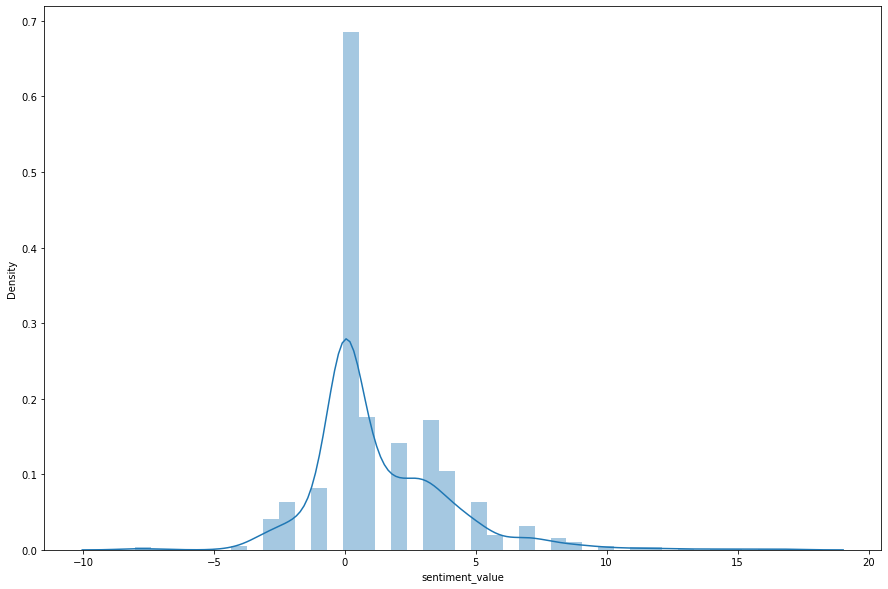

In [44]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])